In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [16]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.42, 0.365, 7.5
param, p2 = get_outer_param_3(Lx,Nx,ϕa,ϕp,v0)
f,u,c = load_out_3(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)
err, avmag, c = check_u_3(u,p2);
print("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")

ϕa,ϕp=(0.42,0.365): c=2.3951244893555343, avmag=1.6091301281674283e-6, err=3.763507061549376e-9

In [17]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.41, 0.365, 7.5
param, p2 = get_outer_param_3(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = load_out_3(Lx,Nx,ϕa,ϕp,v0)
f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)
err, avmag, c = check_u_3(u,p2);
print("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")

ϕa,ϕp=(0.41,0.365): c=2.5351947344543526, avmag=1.5167606191531825e-6, err=8.9710454620473e-9

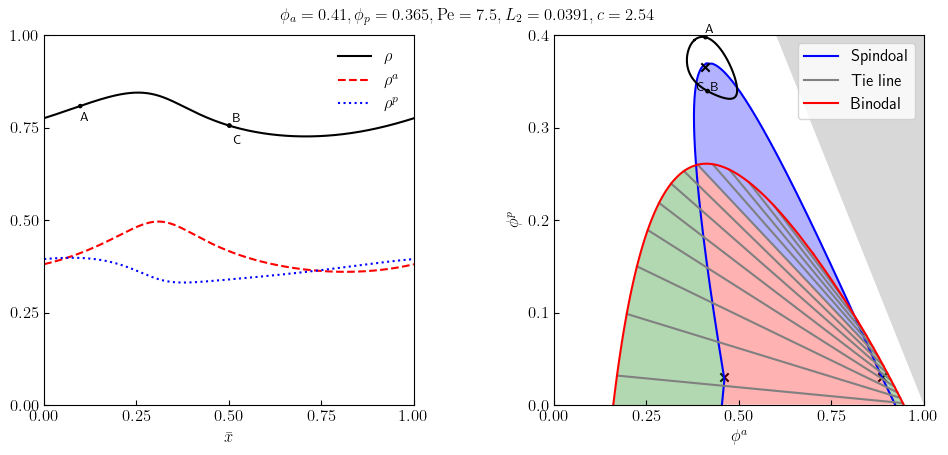

In [18]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c, point = 100)

In [53]:
ϕa = 0.52 #collect(0.29:0.01:0.53)[input]; # 25 long
ϕp = 0.32 #collect(0.25:0.01:0.40)[input]; # 25 long
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, ϕa, ϕp, 7.5

ϕp_sweep = 0.33:(0.005):0.35;
# ϕp_sweep = 0.24:(-0.005):0.20;

# ϕa_sweep = 0.64:(0.01):0.72;
ϕa_sweep = 0.51:(-0.01):4.7;

sweep = (Lx, Nx, ϕa, ϕp, v0)
# param_sweep = [(Lx, Nx, ϕa, ϕp, v0) for ϕp in ϕp_sweep];
# param_sweep = [(Lx, Nx, ϕa, ϕp, v0) for ϕa in ϕa_sweep];
param_sweep = [(Lx, Nx, ϕa, ϕp, v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];

f,u,c = load_out_3(sweep...)

for sweep in param_sweep
    local Lx, Nx, ϕa, ϕp, v0
    global f,u,c
        Lx, Nx, ϕa, ϕp, v0 = sweep
        param, p2 = get_outer_param_3(sweep...)
        f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u)
        err, avmag, c = check_u_3(u,p2);
        print("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")
end

ϕa,ϕp=(0.64,0.24): c=1.0187502385658493, avmag=3.7394752197116715e-7, err=4.442626599931998e-9ϕa,ϕp=(0.65,0.235): c=0.9360996637238217, avmag=-5.637851296924623e-16, err=3.134736914489622e-11ϕa,ϕp=(0.66,0.23): c=0.9072081686930061, avmag=8.998878031629687e-16, err=4.228206673673185e-11ϕa,ϕp=(0.67,0.225): c=0.8796121093858796, avmag=-6.613633252161577e-16, err=6.892064696728539e-11ϕa,ϕp=(0.68,0.22): c=0.8553971243760657, avmag=1.8431436932253575e-16, err=4.9627746356861735e-11ϕa,ϕp=(0.69,0.215): c=0.8342998687874348, avmag=-1.6263032587282567e-16, err=2.275302168897042e-11ϕa,ϕp=(0.7,0.21): c=0.8163178802728653, avmag=7.589415207398531e-17, err=7.674749724628782e-12ϕa,ϕp=(0.71,0.205): c=0.8007981318720856, avmag=1.734723475976807e-16, err=2.063682558173241e-12ϕa,ϕp=(0.72,0.2): c=0.7884334602846113, avmag=-1.6263032587282567e-16, err=4.728439861878542e-13